 blue for train loss
 orange for validation loss


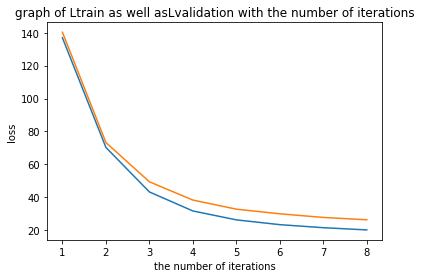

In [11]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t_X,t_y=load_svmlight_file("/Users/hyx/Desktop/machinelearning/project1/Housing.txt")
t_X=t_X.todense()  #转化为普通矩阵

t_X_column_num=t_X[0].size
t_X_row_num=int(t_X.size/t_X_column_num)

ones_column = ones((t_X_row_num,1)) 
t_X=hstack((ones_column,t_X))
t_X_column_num +=1  #加一列1

#将数据集切分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=53)

w = zeros((1,t_X_column_num))
w_temple=zeros((1,t_X_column_num))

alpha = 0.33

train_size = y_train.size
test_size = y_test.size

p_x = []
p_train_loss = []
p_validation_loss = []

for j in range(8):
    for i in range(train_size):
        diff=y_train[i]-float(w*X_train[i].T)
        w_temple=w_temple+(alpha*diff*X_train[i])/train_size
    w=w_temple
    
    #计算train loss
    train_loss=0
    for lp in range(train_size):
        train_loss += (y_train[lp]-float(w*X_train[lp].T))**2/2/train_size
    p_x.append(j+1)
    p_train_loss.append(train_loss)

    #计算validation loss
    validation_loss=0
    for lp in range(test_size):
        validation_loss += (y_test[lp]-float(w*X_test[lp].T))**2/2/test_size
    p_validation_loss.append(validation_loss)

plt.plot(p_x, p_train_loss,label="train loss")
plt.plot(p_x, p_validation_loss,label="validation loss")
plt.title('graph of Ltrain as well asLvalidation with the number of iterations')
plt.ylabel('loss')
plt.xlabel('the number of iterations')

print(' blue for train loss\n orange for validation loss')
# print('train loss:',p_train_loss)
# print('validation loss:',p_validation_loss)